<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/kokachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [32]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [55]:
df = pd.read_csv("/content/n.csv")
df

,surface.pressure,earth skin temp,s.hu,r.hu,surface soil wet,sufc.soil moister,temp at 2m range,wind at 2m range,spi1,wind 10m
0,95.22,23.43,11.60,67.81,0.55,0.58,18.63,4.81,0.653213,6.93
1,95.13,25.94,8.85,48.00,0.34,0.54,22.14,4.37,0.309673,6.03
2,95.04,28.69,12.02,54.81,0.38,0.54,20.80,4.84,0.996379,6.74
3,94.87,29.98,14.34,60.81,0.46,0.54,18.64,4.91,0.183908,7.32
4,94.74,27.30,16.24,74.50,0.58,0.59,14.73,4.25,0.730670,5.91
...,...,...,...,...,...,...,...,...,...,...
487,94.81,24.25,16.42,85.19,0.73,0.72,11.41,5.18,0.440558,7.45
488,94.77,24.24,16.78,86.06,0.77,0.74,10.66,5.23,0.653213,7.37
489,94.84,23.82,17.27,88.75,0.84,0.81,10.03,4.63,1.362146,6.96
490,94.86,22.69,16.72,91.25,0.91,0.90,8.97,4.76,2.208099,7.11


IndexError: ignored

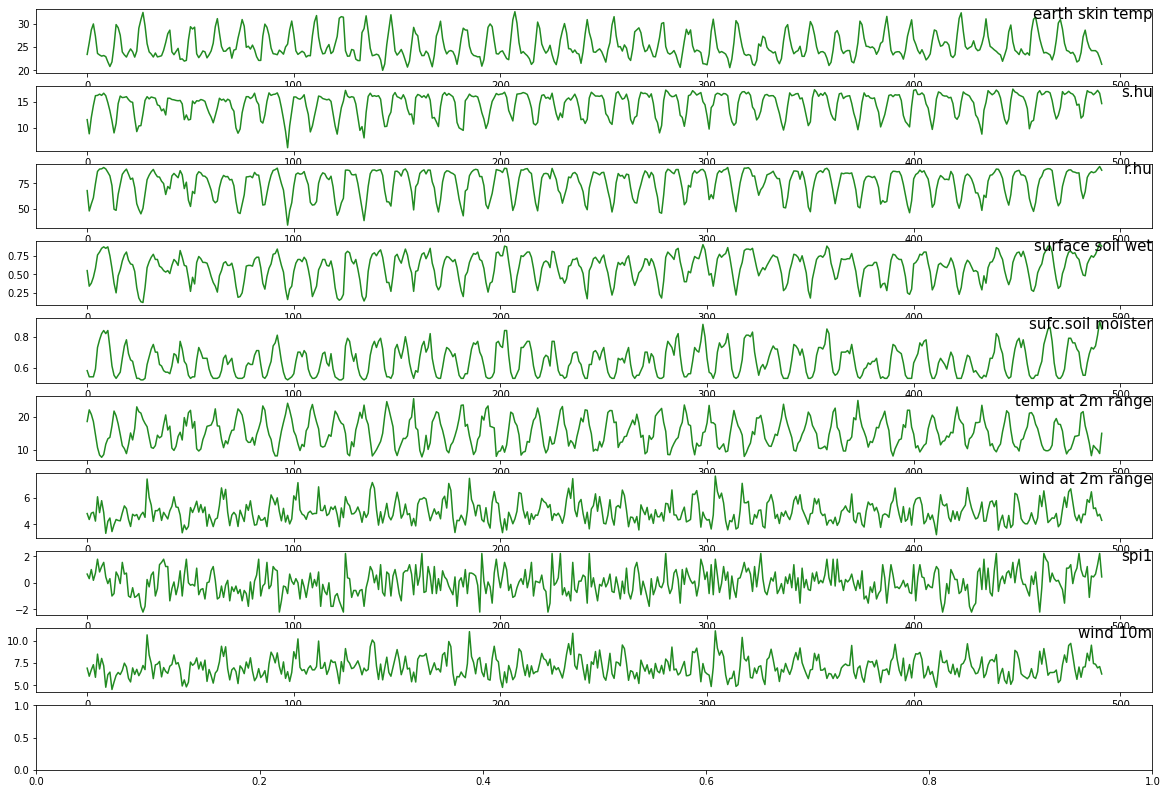

In [56]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 4,5,6,7,8,9,10]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

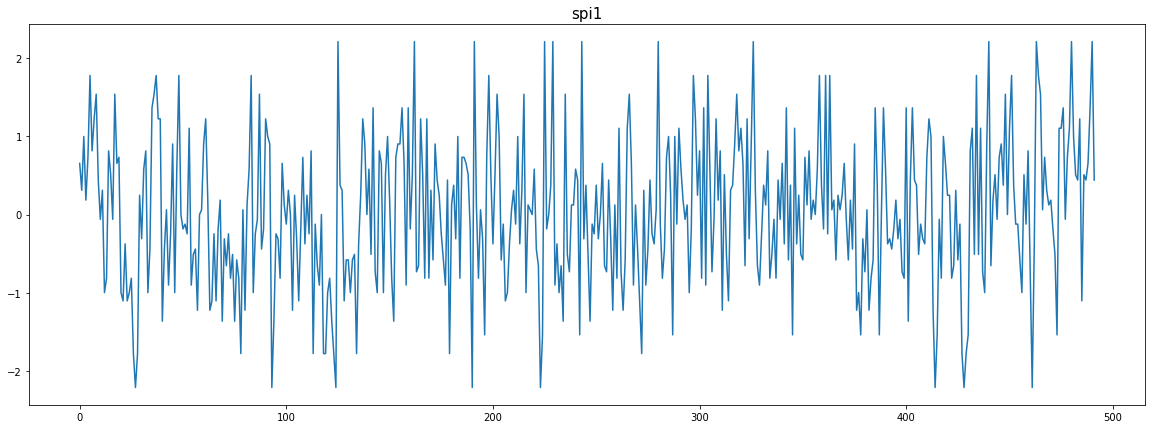

In [57]:
fig = plt.figure(figsize = (20,7))
plt.plot(df.spi1)
plt.title("spi1", fontsize = 15)
plt.show()

In [36]:
#el df["month"]

In [58]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [59]:
# Scaling the entire dataset

dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)

(492, 10)


In [60]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1,1 )
print(reframed.shape)

(491, 20)


In [61]:
print(reframed.head())

# Here, there are some unwanted data, which we don't want to predict, i.e here var2(t), var3(3), ....

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.805199   0.271429   0.478873   0.588772   0.544304   0.157895   
2   0.688309   0.470635   0.236796   0.241228   0.278481   0.052632   
3   0.571434   0.688889   0.515845   0.360702   0.329114   0.052632   
4   0.350655   0.791270   0.720070   0.465965   0.430380   0.052632   
5   0.181816   0.578571   0.887324   0.706140   0.582278   0.184211   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)   var1(t)   var2(t)   var3(t)  \
1   0.610294   0.360092   0.647913    0.363359  0.688309  0.470635  0.236796   
2   0.808824   0.259174   0.570122    0.225954  0.571434  0.688889  0.515845   
3   0.733032   0.366973   0.725619    0.334351  0.350655  0.791270  0.720070   
4   0.610860   0.383027   0.541644    0.422901  0.181816  0.578571  0.887324   
5   0.389706   0.231651   0.665452    0.207634  0.168839  0.288095  0.892606   

    var4(t)   var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  
1  0.241228  0.278

In [62]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)',
       'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)'],
      dtype='object')

In [63]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

    var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)   var7(t)  \
1  0.688309  0.470635  0.236796  0.241228  0.278481  0.052632  0.808824   
2  0.571434  0.688889  0.515845  0.360702  0.329114  0.052632  0.733032   
3  0.350655  0.791270  0.720070  0.465965  0.430380  0.052632  0.610860   
4  0.181816  0.578571  0.887324  0.706140  0.582278  0.184211  0.389706   
5  0.168839  0.288095  0.892606  0.915614  0.810127  0.552632  0.165724   

    var8(t)   var9(t)  var10(t)  
1  0.259174  0.570122  0.225954  
2  0.366973  0.725619  0.334351  
3  0.383027  0.541644  0.422901  
4  0.231651  0.665452  0.207634  
5  0.646789  0.901960  0.603053  


In [64]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 358

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(358, 1, 9) (358,) (133, 1, 9) (133,)


In [65]:
train.shape, test.shape, values.shape

((358, 10), (133, 10), (491, 10))

In [66]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [67]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=25, validation_split=0.2, verbose=2, shuffle=False)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1000)              4040000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,041,001
Trainable params: 4,041,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
12/12 - 3s - loss: 0.0607 - val_loss: 0.0538 - 3s/epoch - 241ms/step
Epoch 2/70
12/12 - 1s - loss: 0.0326 - val_loss: 0.0271 - 579ms/epoch - 48ms/step
Epoch 3/70
12/12 - 1s - loss: 0.0246 - val_loss: 0.0233 - 580ms/epoch - 48ms/step
Epoch 4/70
12/12 - 1s - loss: 0.0204 - val_loss: 0.0211 - 580ms/

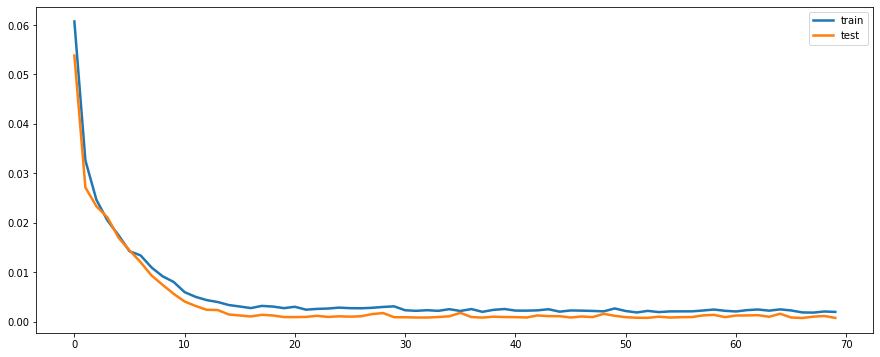

In [68]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [ ]:
test_X.shape

(50, 1, 4)

In [69]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(133, 1)
(133,)


In [49]:
test.shape

(127, 6)

In [ ]:
print(test), print(test.shape)

In [71]:
y_test_true = test[:,9]

In [ ]:
testPredict.shape

(50,)

In [72]:
poll = np.array(df['spi1'])
print(poll.shape)
meanop = poll.mean()
stdop = poll.std()
print(testPredict.shape)
y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

testPredict.shape

(492,)
(133,)


(133,)

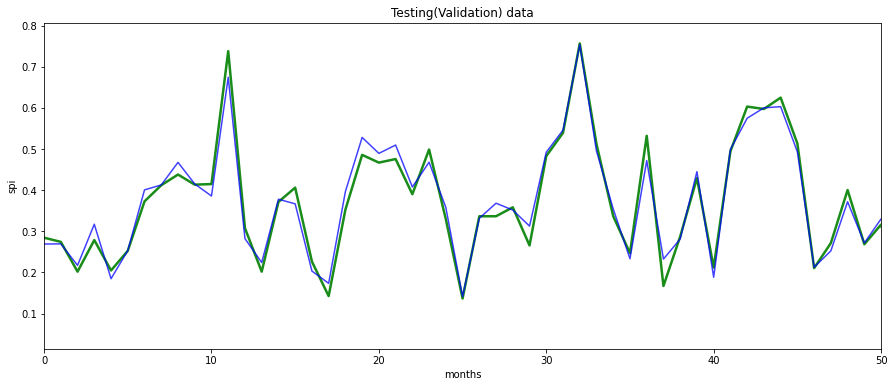

(133,)


In [73]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [74]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

# As we see the,  RMSE for testing data is low, and visually as well, from the above plots, we can see that the basic model is able to
# predict the future values of pollution (in ppm) pretty well

r2socre = 0.971689814099211
Test(Validation) RMSE = 0.026497269
